# Computational Complexity, Big O notation
Lecture based on [The Running Time of Programs chapter by Al Aho and Jeff Ullman](http://infolab.stanford.edu/~ullman/focs/ch03.pdf) and [Matt Gormley's slides](http://www.cs.cmu.edu/~mgormley/courses/606-607-f18/slides607/lecture5-complexity.pdf).

Learning Outcomes:
- Know how the running time of a program is computed.
- Understand Big O notation and how to prove a function is Big O or not Big O of another.

When designing algorithms, we want to know if these algorithms run in a reasonable amount of time and space. We want to know if we can make them more efficient and which part of the algorithm we should focus on making more efficient.

We would also like to be able to compare different algorithm and find our which one is less computationally expensive.

### Big O notation

How many program operations are required to compute:
- Euclidean norm of vector
- Vector dot product 
- Frobenius norm of matrix
- Vector-matrix multiplication 
- Matrix-matrix multiplication


1. Arithmetic operations (e.g. + or %).
2. Logical operations (e.g., &&).
3. Comparison operations (e.g., <=).
4. Structure accessing operations (e.g. array-indexing like A[i], or pointer following with the -> operator).
5. Simple assignment such as copying a value into a variable.
6. Calls to library functions (e.g., scanf, printf)
7. Control Statements (e.g. if X>5)

`def norm(a):
    assert type(a)==type([])
    assert len(a)>0
    ss=0
    for i in range(len(a)):
        ss = ss + a[i]*a[i]
    norm = np.sqrt(ss)
    return norm`

#### Definition of Big O
Let $T(n)$ be a function, be the running time of some program as a function of the input size n. We  assume that
1. n is an integer $\ge0$
2. $T (n)$ $\ge0$ for all $n$.

$f(n)$ is a function defined on $n$. We say that "$T (n)$ is $O(f(n))$" if there exists a constant $c>0$ and an integer $n_0$ such that, for all integers $n\ge n_0$, we have $T(n) \le cf(n)$.

##### Witnesses. 

$n_0$ and $c$ are called witnesses that $T(n)$ is $O(f(n))$. Finding such witnesses is a form of proof of $T(n)$ being $O(f(n))$.


### Template for Big-Oh Proofs

1. State the witnesses $n_0$ and $c$ as specific constants, e.g.,  $n_0=32$ and $c = 5$. 
2. By appropriate algebraic manipulation, show that if $n \ge n_0$ then $T (n) \le cf(n)$.

Which of the following functions are in $O(n^2)$?
1. $1$
2. $n$
3. $n log(n)$
4. $n^2$
5. $4n^2$
6. $4n^2+ n log(n)$
7. $4n^2+ n log(n) + n$
8. $n^3$
9. $n^3+ n$

##### Example: 
Suppose $T (0) = 1$, $T (1) = 4$, $T (2) = 9$, and in general $T (n) = (n+1)^2$. 

We can say that $T (n)$ or $O(n^2)$, by choosing witnesses $n_0 = 1$ and $c = 4$:
- We expand $(n + 1)^2 = n^2+2n+1$
- if $n \ge 1$, we know that $n \le n^2$ and $1 \le n2$. Thus
$n^2 + 2^n + 1 \le n^2 + 2n^2 + n^2 = 4n^2$.

We could have picked $n_0 = 3$ and $c=2$. However, we can't pick $n_0 = 0$ with any $c$ (why?). But that doesn't matter, be cause we only need to find one pair of witnesses $n_0$ and $c$.
 

It may seem odd that even though $(n + 1)^2 > n^2$, $(n + 1)^2$ is $O(n^2)$. In fact, $(n + 1)^2$ is also big-O of any fraction
of $n^2$, for example, $O(n^2/100)$ ($n_0 = 1$ and $c = 400$). 


More generally:

1. Constant factors don’t matter. For any positive constant $d$ and any function that is $O(T (n))$ is also $O(dT(n))$. (Choose $n_0 = 0$ and $c = 1/d$) 

2. Low-order terms don’t matter. Suppose a polynomial $T (n) = a_k n^k + a_{k−1}n^{k−1} + \dots + a_2n^2 + a_1n + a_0$ where the leading coefficient, $a_k$, is positive. We can throw away all terms exceptthe term with the highest exponent, $k$, and, by rule (1), we can ignore  $a_k$, replacing it by 1. That is, we can conclude $T (n) is O(n^k)$. (To proove, choose n_0 = 1, and $c=\sum_{i=0}^k a^i\delta(a^i>0)$.)

#### Proofs That a Big-Oh Relationship Does Not Hold
The method of proof is to assume that witnesses $n_0$ and $c$ exist, and derive a contradiction. 

##### Example
$n^2$ is not $O(n)$. 

- Suppose it was. Then there are $n_0$ and $c$ such that $n^2 \le cn$ for all $n \ge n_0$. 
- Now pick $n_a>max(n_0,c)+1$, then $(n_a)^2 ≤ cn_a$
- Divide both sides by n_a: we have $n_a \le c$. Contradiction, therefore $n^2$ is not $O(n)$.


1. Prove that $n^3$ is in $O(2^n)$
2. Prove that $n^2 + 100$ is in $O(n4)$
3. Prove that $1/4 n^2+ n log(n) + n$ is in $O(n^2)$


Comparing Algorithm Runtimes

- $O(1)$ constant
- $O(log(n))$ logarithmic
- $O(n)$ linear 
- $O(nlog(n))$ --
- $O(n2)$ quadratic
- $O(n3)$ cubic
- $O(2^n)$ exponential
- $O(n!)$ factorial
- $O(n^n)$ superexponential


There are some common rules you can use:

- constant < logarithmic < polynomial < exponential < factorial < superexponential

###### Computational Complexity of Matrix Multiplication
Key idea: don’t count the exact number of operations!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


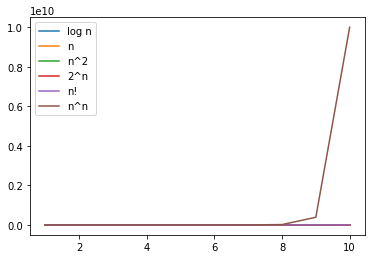

In [21]:
n = np.arange(1,11)

plt.plot(n,np.log(n),label = 'log n')
plt.plot(n,n,label = 'n')
plt.plot(n,n**2,label = 'n^2')
plt.plot(n,2**n,label = '2^n')

def factorial(n):
    if n < 2:
        return 1
    else:
        return n * factorial(n-1)
    
plt.plot(n,[factorial(i) for i in n],label = 'n!')
plt.plot(n,n**n,label = 'n^n')

plt.legend(loc='upper left')